In [12]:
import c3d
import mat4py
import functools
import scipy.io
from torch.utils.data import TensorDataset, DataLoader, Dataset
from tqdm import notebook
from torch.optim import Adam
from torch.utils.data import DataLoader
import tqdm
device ='cpu'

In [13]:

mat = scipy.io.loadmat('C:\\Users\\Desktop\\Thesis\\HumanEval\\S1\\Mocap_Data\\Jog_1.mat')

In [14]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Apr 20 11:49:05 2006',
 '__version__': '1.0',
 '__globals__': [],
 'Markers': array([[[ 221.59651184,  343.78814697,  856.953125  ],
         [ 122.5647049 ,  118.52044678,  916.05212402],
         [ 323.14709473,  262.29598999,  691.0211792 ],
         ...,
         [   0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        ]],
 
        [[ 220.72203064,  348.77249146,  857.690979  ],
         [ 124.97068787,  123.20597076,  916.60211182],
         [ 323.64660645,  272.44403076,  692.46826172],
         ...,
         [   0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        ]],
 
        [[ 219.99052429,  354.8649292 ,  858.96362305],
         [ 127.46140289,  128.49403381,  917.2857666 ],
         [ 323.96463013,  282.6530

In [15]:
mat['Markers'][100][1:38]

array([[-107.75002289,  662.16625977,  927.76623535],
       [-242.01901245,  851.54187012,  687.47668457],
       [-359.94796753,  852.9152832 ,  878.99090576],
       [-417.79483032,  859.11657715,  946.67370605],
       [-398.15286255,  857.25970459, 1013.37237549],
       [-300.65155029,  885.99603271,  997.37463379],
       [-272.61184692,  411.4982605 ,  846.56866455],
       [-426.41629028,  650.15258789, 1050.02526855],
       [-351.17025757,  420.18185425,  885.65167236],
       [-140.3553772 ,  603.88140869, 1111.09692383],
       [-284.56442261,  518.98553467,  536.41174316],
       [-195.56704712,  360.42401123,  978.14501953],
       [-139.53379822,  891.66943359, 1017.83538818],
       [-369.11694336,  421.956604  ,  949.84436035],
       [-204.09771729,  886.31103516, 1114.3347168 ],
       [-160.49075317,  662.32202148, 1218.29724121],
       [-298.08358765,  875.10455322,  449.64633179],
       [-317.97723389,  586.00518799,  406.1756897 ],
       [-369.06964111,  619.

In [16]:
# OK now do I have names for the markers? How do I know where to impose constraints

In [17]:
len(mat['ParameterGroup'][0][2][2][0][14][2][0])

196

In [18]:
mat['ParameterGroup'][0][2][2][0][15][2][0]

array([array(['Right ASIS'], dtype='<U10'),
       array(['Right PSIS'], dtype='<U10'),
       array(['Right thigh wand marker'], dtype='<U23'),
       array(['Right wrist bar pinkie side (alternative pair 1)'], dtype='<U48'),
       array(['Right finger'], dtype='<U12'),
       array(['Right wrist bar thumb side (alternative pair 1)'], dtype='<U47'),
       array(['Right forearm (optional alternative anti-sym)'], dtype='<U45'),
       array(['Left wrist bar pinkie side (alternative pair 1)'], dtype='<U47'),
       array(['Sternum'], dtype='<U7'),
       array(['Left finger'], dtype='<U11'),
       array(['Upper back'], dtype='<U10'),
       array(['Left thigh wand marker'], dtype='<U22'),
       array(['Left forearm (optional alternative anti-sym)'], dtype='<U44'),
       array(['Right elbow'], dtype='<U11'),
       array(['Left wrist bar thumb side (alternative pair 1)'], dtype='<U46'),
       array(['Right upper arm (optional alternative anti-sym)'], dtype='<U47'),
       array(['Ri

In [19]:
mat['ParameterGroup'][0][2][2][0][15][2][0][11]

array(['Left thigh wand marker'], dtype='<U22')

In [20]:
mat['ParameterGroup'][0][2][2][0][15][2][0][48]

array(['Left Ankle Rotation'], dtype='<U19')

In [21]:
mat['ParameterGroup'][0][2][2][0][15][2][0][17]

array(['Right knee'], dtype='<U10')

In [22]:
mat['ParameterGroup'][0][2][2][0][14][2][0][0]

array(['RL:RASI'], dtype='<U7')

In [23]:
mat['ParameterGroup'][0][2][2][0][14][2][0][36]

array(['RL:LASI'], dtype='<U7')

In [24]:
# I need to identify the relevant markers.

In [25]:
import matplotlib.pyplot as plt

In [26]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# xs= [pt[0] for pt in mat['Markers'][0]]
# ys= [pt[1] for pt in mat['Markers'][0]]
# zs= [pt[2] for pt in mat['Markers'][0]]
# ax.scatter([xs[48],xs[41]], [ys[48],ys[41]], [zs[3],zs[7]], label = 'Wrists')
# ax.scatter([xs[13],xs[35]], [ys[13],ys[35]], [zs[13],zs[35]], label = 'Elbows', color = 'Green')
# ax.scatter(xs[17:19], ys[17:19], zs[17:19], label = 'Knees', color = 'red')
# ax.scatter(xs[29:30], ys[29:30], zs[29:30], label = 'Head', color = 'yellow')
# ax.scatter([xs[32],xs[24]], [ys[32], ys[24]], [zs[32],zs[24]], label = 'Ankles', color = 'Orange')
# ax.scatter(xs[32],xs[24], [ys[zs[32],zs[24]], label = 'Ankles', color = 'Orange')

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3304218957.py, line 11)

In [ ]:
t = 0

In [27]:
# fig = plt.figure()
# ax = fig.add_subplot()
# xs= [pt[0] for pt in mat['Markers'][t]]
# ys= [pt[1] for pt in mat['Markers'][t]]
# zs= [pt[2] for pt in mat['Markers'][t]]
# ax.scatter([xs[3],xs[7]],  [zs[3],zs[7]], label = 'Wrists')
# ax.scatter([xs[13],xs[35]], [zs[13],zs[35]], label = 'Elbows', color = 'Green')
# ax.scatter(xs[17:19],zs[17:19], label = 'Knees', color = 'red')
# ax.scatter(xs[29:30], zs[29:30], label = 'Head', color = 'yellow')
# ax.scatter([xs[32],xs[24]], [zs[32],zs[24]], label = 'Ankles', color = 'Orange')
# ax.scatter(xs[22:24], zs[22:24], label = 'Shoulders', color = 'Purple')
# ax.scatter([xs[36],xs[0]], [zs[36],zs[0]], label = 'ASIS', color = 'Black')
# ax.scatter(xs[8],zs[8], label = 'Sternum', color = 'purple')
# ax.scatter(xs[19],zs[19], label = 'Clavicle', color = 'purple')
# ax.scatter([xs[11],xs[2]],[zs[11], zs[2]], label = 'Thighs', color = 'pink')

In [28]:
import math

In [29]:
mat['Markers'][0][17]

array([348.44775391, 361.08709717, 464.1541748 ])

In [30]:
ds = []
for t in range(1,300):
    right_knee =mat['Markers'][t][17]
    right_asis = mat['Markers'][t][0]
    d = math.dist(right_knee,right_asis)
    ds.append(d)

In [31]:
ds_left = []
for t in range(1,300):
    left_knee =mat['Markers'][t][18]
    left_asis = mat['Markers'][t][34]
    d = math.dist(left_knee,left_asis)
    ds_left.append(d)

In [32]:
ds_left_shoulder = []
for t in range(1,300):
    left_shoulder =mat['Markers'][t][22]
    clavicle = mat['Markers'][t][19]
    d = math.dist(left_shoulder,clavicle)
    ds_left_shoulder.append(d)

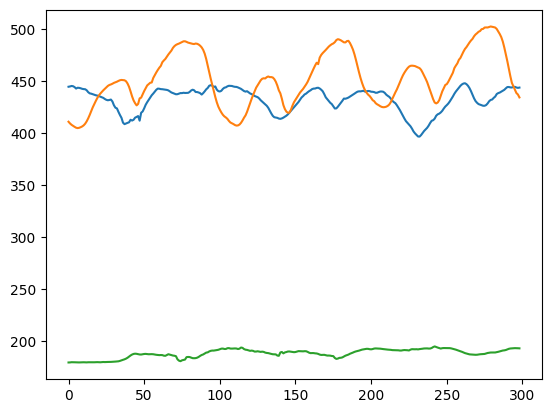

In [33]:
plt.plot(ds_left)
plt.plot(ds)
plt.plot(ds_left_shoulder)

# The Neural Network

Note - instead of a 2d image I'll input 2d matrix of 3d data... Not sure how much I should change anything...

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class GaussianFourierProjection(nn.Module):
  """Gaussian random features for encoding time steps."""
  def __init__(self, embed_dim, scale=30.):
    super().__init__()
    # Randomly sample weights during initialization. These weights are fixed
    # during optimization and are not trainable.
    self.W = nn.Parameter(torch.randn(embed_dim // 2) * scale, requires_grad=False)

  def forward(self, x):
    x_proj = x[:, None] * self.W[None, :] * 2 * np.pi
    return torch.cat([torch.sin(x_proj), torch.cos(x_proj)], dim=-1)

In [35]:
class Dense(nn.Module):
  """A fully connected layer that reshapes outputs to feature maps."""
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.dense = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    return self.dense(x)[..., None, None]


In [46]:
class ScoreNet(nn.Module):
  """A time-dependent score-based model built upon U-Net architecture."""

  def __init__(self, marginal_prob_std, channels=[32, 64, 128, 256], embed_dim=16*3):
    """Initialize a time-dependent score-based network.

    Args:
      marginal_prob_std: A function that takes time t and gives the standard
        deviation of the perturbation kernel p_{0t}(x(t) | x(0)).
      channels: The number of channels for feature maps of each resolution.
      embed_dim: The dimensionality of Gaussian random feature embeddings.
    """
    super().__init__()
    # Gaussian random feature embedding layer for time
    self.embed = nn.Sequential(GaussianFourierProjection(embed_dim=embed_dim),
         nn.Linear(embed_dim, embed_dim))
    # Encoding layers where the resolution decreases
    self.conv1 = nn.Conv2d(1, channels[0], 1, stride=1, bias=False)
    self.dense1 = Dense(embed_dim, channels[0])
    self.gnorm1 = nn.GroupNorm(4, num_channels=channels[0])
    self.conv2 = nn.Conv2d(channels[0], channels[1], 1, stride=1, bias=False)
    self.dense2 = Dense(embed_dim, channels[1])
    self.gnorm2 = nn.GroupNorm(32, num_channels=channels[1])
    self.conv3 = nn.Conv2d(channels[1], channels[2], 1, stride=1, bias=False)
    self.dense3 = Dense(embed_dim, channels[2])
    self.gnorm3 = nn.GroupNorm(32, num_channels=channels[2])
    self.conv4 = nn.Conv2d(channels[2], channels[3], 1, stride=1, bias=False)
    self.dense4 = Dense(embed_dim, channels[3])
    self.gnorm4 = nn.GroupNorm(32, num_channels=channels[3])

    # Decoding layers where the resolution increases
    self.tconv4 = nn.ConvTranspose2d(channels[3], channels[2], 1, stride=1, bias=False)
    self.dense5 = Dense(embed_dim, channels[2])
    self.tgnorm4 = nn.GroupNorm(32, num_channels=channels[2])
    self.tconv3 = nn.ConvTranspose2d(channels[2] + channels[2], channels[1], 1, stride=1, bias=False, output_padding=0)
    self.dense6 = Dense(embed_dim, channels[1])
    self.tgnorm3 = nn.GroupNorm(32, num_channels=channels[1])
    self.tconv2 = nn.ConvTranspose2d(channels[1] + channels[1], channels[0], 1, stride=1, bias=False, output_padding=0)
    self.dense7 = Dense(embed_dim, channels[0])
    self.tgnorm2 = nn.GroupNorm(32, num_channels=channels[0])
    self.tconv1 = nn.ConvTranspose2d(channels[0] + channels[0], 1, 1, stride=1)
    # The swish activation function
    self.act = lambda x: x * torch.sigmoid(x)
    self.marginal_prob_std = marginal_prob_std

  def forward(self, x, t):
    # Obtain the Gaussian random feature embedding for t
    embed = self.act(self.embed(t))
    # Encoding path
    h1 = x
    ## Incorporate information from t
    h1 += self.dense1(embed)
    ## Group normalization
    h1 = self.gnorm1(h1)
    h1 = self.act(h1)
    print(f"size of final h1 {h1.size()}")
    h2 = h1
    print(f"size of initial h2 {h2.size()}")
    h2 += self.dense2(embed)
    print(f"size of h2 after dense2 {h2.size()}")
    h2 = self.gnorm2(h2)
    print(f"size of h2 after gnorm2 {h2.size()}")
    h2 = self.act(h2)
    print(f"size of final h2 {h2.size()}")
    h3 = h2
    h3 += self.dense3(embed)
    h3 = self.gnorm3(h3)
    h3 = self.act(h3)
    h4 = h3
    h4 += self.dense4(embed)
    h4 = self.gnorm4(h4)
    h4 = self.act(h4)

    # Decoding path
    h = h4
    ## Skip connection from the encoding path
    h += self.dense5(embed)
    h = self.tgnorm4(h)
    h = self.act(h)
    h = self.tconv3(torch.cat([h, h3], dim=1))
    h += self.dense6(embed)
    h = self.tgnorm3(h)
    h = self.act(h)
    h = self.tconv2(torch.cat([h, h2], dim=1))
    h += self.dense7(embed)
    h = self.tgnorm2(h)
    h = self.act(h)
    #h = self.tconv1(torch.cat([h, h1], dim=1))

    # Normalize output
    h = h / self.marginal_prob_std(t)[:, None, None, None]
    return h

In [47]:
# ax.scatter([xs[3],xs[7]],  [zs[3],zs[7]], label = 'Wrists')
# ax.scatter([xs[13],xs[35]], [zs[13],zs[35]], label = 'Elbows', color = 'Green')
# ax.scatter(xs[17:19],zs[17:19], label = 'Knees', color = 'red')
# ax.scatter(xs[29:30], zs[29:30], label = 'Head', color = 'yellow')
# ax.scatter([xs[32],xs[24]], [zs[32],zs[24]], label = 'Ankles', color = 'Orange')
# ax.scatter(xs[22:24], zs[22:24], label = 'Shoulders', color = 'Purple')
# ax.scatter([xs[36],xs[0]], [zs[36],zs[0]], label = 'ASIS', color = 'Black')
# ax.scatter(xs[8],zs[8], label = 'Sternum', color = 'purple')
# ax.scatter(xs[19],zs[19], label = 'Clavicle', color = 'purple')
# ax.scatter([xs[11],xs[2]],[zs[11], zs[2]], label = 'Thighs', color = 'pink')

In [48]:
# note - I should sort these
indices = [3,7,13,35,17,18,29,32,24,22,23,36,0,19,11,2]
dataset = []
for i in range(len(mat['Markers'])):
  data = [mat['Markers'][i][j] for j in indices]
  dataset.append(torch.tensor(np.array(data), dtype =torch.double).unsqueeze(0))

In [50]:
class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        x = self.tensors[0][index]

        if self.transform:
            x = self.transform(x)

        y = self.tensors[1][index]

        return x, y

    def __len__(self):
        return self.tensors[0].size(0)


In [51]:
def collate_fn(batch):
    return list(batch)

In [52]:
#tensor_x = torch.stack(ds)
#dataset = TensorDataset(tensor_x) # create your datset
data_loader = DataLoader(dataset,batch_size=32,shuffle=True) # create your dataloader

In [53]:
for x in data_loader:
  print(x[0].size())
  break

torch.Size([1, 16, 3])


In [54]:
#for i in data_loader:
#  print(i[0])

In [55]:
#@title Set up the SDE

#device = 'cuda' #@param ['cuda', 'cpu'] {'type':'string'}

def marginal_prob_std(t, sigma):
  """Compute the mean and standard deviation of $p_{0t}(x(t) | x(0))$.

  Args:
    t: A vector of time steps.
    sigma: The $\sigma$ in our SDE.

  Returns:
    The standard deviation.
  """
  t = torch.tensor(t, device=device)
  return torch.sqrt((sigma**(2 * t) - 1.) / 2. / np.log(sigma))

def diffusion_coeff(t, sigma):
  """Compute the diffusion coefficient of our SDE.

  Args:
    t: A vector of time steps.
    sigma: The $\sigma$ in our SDE.

  Returns:
    The vector of diffusion coefficients.
  """
  return torch.tensor(sigma**t, device=device)

sigma =  25.0#@param {'type':'number'}
marginal_prob_std_fn = functools.partial(marginal_prob_std, sigma=sigma)
diffusion_coeff_fn = functools.partial(diffusion_coeff, sigma=sigma)

In [56]:
#@title Define the loss function (double click to expand or collapse)
def loss_fn(model, x, marginal_prob_std, eps=1e-5):
  """The loss function for training score-based generative models.

  Args:
    model: A PyTorch model instance that represents a
      time-dependent score-based model.
    x: A mini-batch of training data.
    marginal_prob_std: A function that gives the standard deviation of
      the perturbation kernel.
    eps: A tolerance value for numerical stability.
  """
  random_t = torch.rand(x.shape[0], device=x.device) * (1. - eps) + eps
  z = torch.randn_like(x)
  std = marginal_prob_std(random_t)
  perturbed_x = x + z * std[:, None, None, None]
  score = model(perturbed_x, random_t)
  loss = torch.mean(torch.sum((score * std[:, None, None, None] + z)**2, dim=(1,2,3)))
  return loss

In [57]:
#@title Training (double click to expand or collapse)
score_model = torch.nn.DataParallel(ScoreNet(marginal_prob_std=marginal_prob_std_fn)).double()
#score_model = score_model.to(device)

n_epochs =   50#@param {'type':'integer'}
## size of a mini-batch
batch_size =  32 #@param {'type':'integer'}
## learning rate
lr=1e-4 #@param {'type':'number'}

#dataset = MNIST('.', train=True, transform=transforms.ToTensor(), download=True)
#data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)

optimizer = Adam(score_model.parameters(), lr=lr)
tqdm_epoch = tqdm.notebook.trange(n_epochs)
for epoch in tqdm_epoch:
  avg_loss = 0.
  num_items = 0
  for x in data_loader:
    x = x.to(device)
    loss = loss_fn(score_model, x.double(), marginal_prob_std_fn)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    avg_loss += loss.item() * x.shape[0]
    num_items += x.shape[0]
  # Print the averaged training loss so far.
  tqdm_epoch.set_description('Average Loss: {:5f}'.format(avg_loss / num_items))
  # Update the checkpoint after each epoch of training.
  torch.save(score_model.state_dict(), 'ckpt.pth')

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24048\3390477272.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, device=device)


RuntimeError: output with shape [32, 1, 16, 3] doesn't match the broadcast shape [32, 32, 16, 3]